In [1]:
#neural network

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pathlib import Path
import tensorflow as tf
import pandas as pd
import os

In [2]:
# Import and read the csv
from pathlib import Path
file_path = Path(f'/content/Patient_Data.csv')
df = pd.read_csv(file_path)
df.head()

,PatientID,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,1,3,4.0,0.0,0,1,9.0,0,...,0,1.60,71.67,0,0,1,1,0,0,0
1,1,0,0,3,0.0,0.0,0,1,6.0,0,...,1,1.78,95.25,0,0,1,1,1,0,0
2,2,0,0,3,0.0,0.0,0,0,8.0,1,...,2,1.85,108.86,1,0,0,1,2,0,1
3,3,0,1,1,5.0,0.0,0,1,9.0,0,...,3,1.70,90.72,0,0,1,1,2,0,1
4,4,0,1,2,3.0,15.0,0,1,5.0,2,...,3,1.55,79.38,0,0,1,1,2,0,0


In [3]:
# Checking unique values
df_cat = df.dtypes.index.tolist()
df[df_cat].nunique()

PatientID                    246022
State                            54
Sex                               2
GeneralHealth                     5
PhysicalHealthDays               31
MentalHealthDays                 31
LastCheckupTime                   4
PhysicalActivities                2
SleepHours                       23
RemovedTeeth                      4
HadHeartAttack                    2
HadAngina                         2
HadStroke                         2
HadAsthma                         2
HadSkinCancer                     2
HadCOPD                           2
HadDepressiveDisorder             2
HadKidneyDisease                  2
HadArthritis                      2
HadDiabetes                       4
DeafOrHardOfHearing               2
BlindOrVisionDifficulty           2
DifficultyConcentrating           2
DifficultyWalking                 2
DifficultyDressingBathing         2
DifficultyErrands                 2
SmokerStatus                      4
ECigaretteUsage             

In [4]:
# Droping PatientID column
df.drop(['PatientID'], axis=1, inplace=True)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,1,3,4.0,0.0,0,1,9.0,0,0,...,0,1.60,71.67,0,0,1,1,0,0,0
1,0,0,3,0.0,0.0,0,1,6.0,0,0,...,1,1.78,95.25,0,0,1,1,1,0,0
2,0,0,3,0.0,0.0,0,0,8.0,1,0,...,2,1.85,108.86,1,0,0,1,2,0,1
3,0,1,1,5.0,0.0,0,1,9.0,0,0,...,3,1.70,90.72,0,0,1,1,2,0,1
4,0,1,2,3.0,15.0,0,1,5.0,2,0,...,3,1.55,79.38,0,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,53,0,3,0.0,0.0,2,1,6.0,0,0,...,6,1.78,102.06,1,0,0,0,1,0,0
246018,53,1,1,0.0,7.0,0,1,7.0,0,0,...,10,1.93,90.72,0,0,0,0,2,0,1
246019,53,0,2,0.0,15.0,0,1,7.0,2,0,...,0,1.68,83.91,1,1,1,1,1,0,1
246020,53,1,4,2.0,2.0,0,1,7.0,0,0,...,4,1.70,83.01,0,1,1,0,1,0,0


In [5]:
heartdisease = []
# If patient had heart attack or angina, they will be classified as having heart disease
for index, row in df.iterrows():
    if (row['HadHeartAttack'] + row['HadAngina']) > 0:
        heartdisease.append(1)
    else:
        heartdisease.append(0)
# use these results as y variable for building model
y = pd.DataFrame(heartdisease,columns=['HadHeartDisease'])
y

,HadHeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
246017,0
246018,0
246019,0
246020,0


In [6]:
# Splitting data and defining values
X = df.drop(columns=['HadHeartAttack','HadAngina'])
y = pd.DataFrame(heartdisease,columns=['HadHeartDisease'])
# Split data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create a StandardScaler instance
import sklearn as skl

X_scaler = skl.preprocessing.StandardScaler()
# Fit the Standard Scaler
X_scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [8]:
# Creating Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Adding first dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=37))

In [10]:
# Adding output layer that uses a probability activation funtion
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Checking Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 304       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 313 (1.22 KB)
Trainable params: 313 (1.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compiling the Sequential model together with custom metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Training model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
5767/5767 [==============================] - 13s 2ms/step - loss: 0.2517 - accuracy: 0.9066
Epoch 2/100
5767/5767 [==============================] - 13s 2ms/step - loss: 0.2317 - accuracy: 0.9132
Epoch 3/100
5767/5767 [==============================] - 12s 2ms/step - loss: 0.2301 - accuracy: 0.9137
Epoch 4/100
5767/5767 [==============================] - 13s 2ms/step - loss: 0.2295 - accuracy: 0.9140
Epoch 5/100
5767/5767 [==============================] - 13s 2ms/step - loss: 0.2291 - accuracy: 0.9139
Epoch 6/100
5767/5767 [==============================] - 12s 2ms/step - loss: 0.2289 - accuracy: 0.9137
Epoch 7/100
5767/5767 [==============================] - 13s 2ms/step - loss: 0.2287 - accuracy: 0.9140
Epoch 8/100
5767/5767 [==============================] - 12s 2ms/step - loss: 0.2285 - accuracy: 0.9141
Epoch 9/100
5767/5767 [==============================] - 12s 2ms/step - loss: 0.2284 - accuracy: 0.9139
Epoch 10/100
5767/5767 [==============================] - 12s 2m

In [13]:
# Evaluating the model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1923/1923 - 3s - loss: 0.2295 - accuracy: 0.9142 - 3s/epoch - 1ms/step
Loss: 0.2295289784669876, Accuracy: 0.9141872525215149


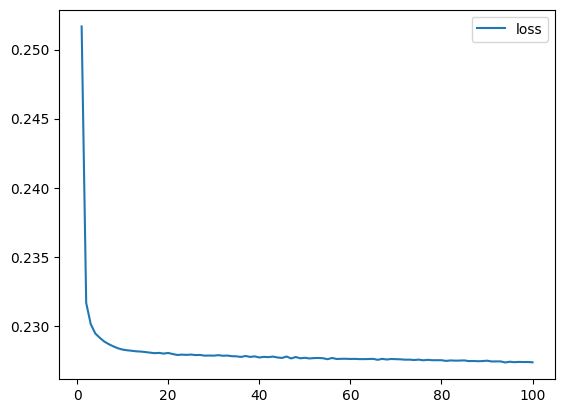

In [14]:
import matplotlib.pyplot as plt
# Creating a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)
# Increasing the index to match the number of epochs
history_df.index += 1
# Plotting the loss
history_df.plot(y="loss")
plt.show()

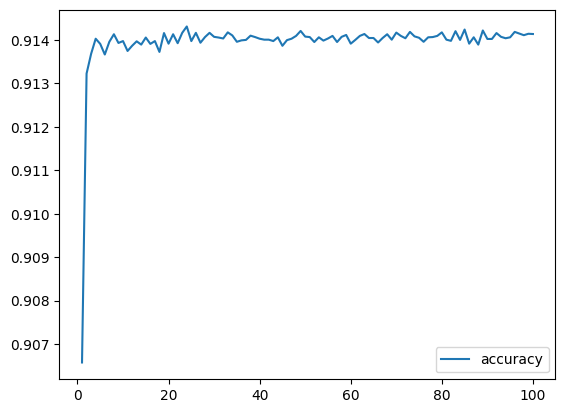

In [15]:
# Plotting the accuracy
history_df.plot(y="accuracy")
plt.show()